In [1]:
simulation_dir = "../simulations/2019-07-31-circular-morphology//"

In [2]:
from interneuron_polarity.io.io import IO

In [3]:
my_io = IO(simulation_dir)

In [4]:
morphology = my_io.load_morphology_dict()

Loaded ../simulations/2019-07-31-circular-morphology//morphology.json 
{'comments': ['cell bodies/um**3', 'um'],
 'excitatory_neurons': {'density': 1.8e-05},
 'inhibitory_neurons': {'density': 9e-06, 'long_axis': 69, 'short_axis': 69},
 'slice': {'x': 300, 'y': 300, 'z': 150}}


In [5]:
from interneuron_polarity.io.io import get_slice_dimensions

In [6]:
slice_dimensions = get_slice_dimensions(morphology)

In [7]:
ex_positions, in_positions, in_orientations = my_io.load_positions_and_orientations()

Load ../simulations/2019-07-31-circular-morphology//out/ex_positions.npy
Load ../simulations/2019-07-31-circular-morphology//out/in_positions.npy
Load ../simulations/2019-07-31-circular-morphology//out/in_orientations.npy


In [8]:
in_ex_connectivity = my_io.load_in_ex_connectivity()

Load ../simulations/2019-07-31-circular-morphology//out/in_ex_connectivity.npy


In [9]:
import numpy as np

In [10]:
np.expand_dims(in_positions[:,0], 1)

array([[181.90311438],
       [ 52.33809183],
       [ 17.96899656]])

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def add_somata(ax, position, plot_config):
    if len(position.shape) == 1:
        position = np.expand_dims(position, 1)
    ax.scatter(position[0,:],position[1,:], position[2,:], **plot_config)

def plot_volume_with_connectivity(ex_position, in_positions, in_ex_connectivity, in_idx, v_x, v_y, v_z):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    
    #Plot all excitatory somata
    add_somata(ax, ex_position, {"color": "r", "marker": "^", "alpha": 0.2})
    
    #Plot inhibitory neuron and all connected excitatory cells
    add_somata(ax, in_positions[:,in_idx], {"color": 'g', "marker": "o", "s":100} )
    connected_somata = ex_position[:, np.where(in_ex_connectivity[in_idx])[0]]
    add_somata(ax, connected_somata, {"color": 'g', "marker": "^"} )

    ax.set_xlabel("um")
    ax.set_ylabel("um")
    ax.set_zlabel("um")
    
    ax.set_xlim(0, v_x)
    ax.set_ylim(0, v_y)
    ax.set_zlim(0, v_z)
    return fig

In [22]:
from interneuron_polarity.model.morphology.shapes import Ellipsoid, NeuralVolume

Identify morphological connection of interneurons to excitatory neurons: 100%|██████████| 121/121 [00:00<00:00, 6455.89it/s]

(3, 121)


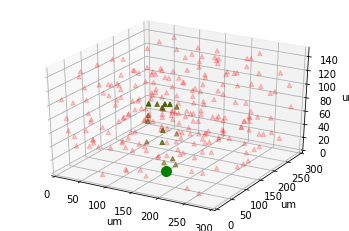

In [23]:
nv = NeuralVolume(300, 300, 300, 10)


e = Ellipsoid(200, 40)
test_coordinates = ex_positions
#orientation = np.expand_dims(in_orientations[:,7], axis=1)
#orientation = in_orientations[:,7]
orientation = in_orientations
test_interneurons = in_positions
n_ex = test_coordinates.shape[1]
n_in = test_interneurons.shape[1]


from interneuron_polarity.actions.create_connectivity import get_in_ex_connectivity

in_ex_connectivity = get_in_ex_connectivity(n_ex, n_in, test_coordinates, test_interneurons, e, orientation)

_= plot_volume_with_connectivity(test_coordinates, test_interneurons, in_ex_connectivity, 0, 300, 300, 150)